## Identification of all the members of the group.
Name: Eduardo Laurentino - nusp

Name: Gabriel Brandão de Almeida - nusp 10737182

Name: Rodrigo Toscano Ney - nusp 11361219

## Name of the dataset
Dataset: Video Game Sales

## Abstract
O dataset contem informações diversas sobre o mercado de jogos, como:
- Informações de vendas dos jogos
  - Em regioes como america do norte, europa e japão e resto do mundo.
- Dados de pontuação dos jogos
  - Em pontuação total por criticos e número de críticos
  - Em pontuação total por jogadores e número de jogadores
- Informações da plataforma dos jogos
- Informações do ano de lançamento
- Produta do jogo

Com esses dados conseguimos fazer um EDA que responde perguntas mais básicas sobre a saude desse dataset.



### EDA
EDA strategy:
- Data Collection
  - A coleta de dados é o processo de coleta de informações de uma forma sistemática estabelecida que permite testar hipóteses e avaliar resultados facilmente.
- Data Cleaning
  - A limpeza de dados é o processo de garantir que seus dados estejam corretos e utilizáveis, identificando quaisquer erros nos dados ou dados ausentes, corrigindo-os ou excluindo-os.
- Data Preprocessing
  - O pré-processamento de dados é uma técnica de mineração de dados que envolve a transformação de dados brutos em um formato compreensível. Inclui normalização e padronização, transformação, extração e seleção de recursos, etc.
- Data Visualisation
  -  A visualização de dados é a representação gráfica de informações e dados. Ele usa gráficos estatísticos, plotagens, gráficos de informação e outras ferramentas para comunicar informações de forma clara e eficiente.

## Questions to the dataset
1. Quais jogos venderam mais (Global, NA, EU, JP)? 
2. Quais jogos tem melhor avaliação ("rate") do público? 
3. Qual plataforma tem mais títulos?
4. Qual a distribuição dos jogos por ano de publicação? 
5. Os jogos com melhores avaliações têm os maiores números de vendas? 
6. Os jogos com maior número de avaliações tem as melhores avaliações? 
7. Os jogos com maior venda são também os com maior número de avaliações
(Critic_count; User_count)?  


### Data Collection

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/wtamu-cisresearch/scraper/master/gamedata-20140215-11_53_10.csv', skiprows=[0])

df.dropna(subset = ['release year'], inplace=True)
df['release year'] = df['release year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5322 entries, 0 to 5440
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 5322 non-null   object 
 1   platform             5322 non-null   object 
 2   release year         5322 non-null   int64  
 3   genre                5322 non-null   object 
 4   publisher            5322 non-null   object 
 5   north america sales  5322 non-null   float64
 6   europe sales         5322 non-null   float64
 7   japan sales          5322 non-null   float64
 8   rest of world sales  5322 non-null   float64
 9   global sales         5322 non-null   float64
 10  release date         3646 non-null   object 
 11  critic score         2931 non-null   float64
 12  critic outof         2931 non-null   float64
 13  critic count         2931 non-null   float64
 14  user score           3595 non-null   object 
 15  user count           2751 non-null   f

In [2]:
df.head()

name platform  ...  developer rating
0                 Wii Sports      Wii  ...   Nintendo      E
1             Mario Kart Wii      Wii  ...   Nintendo      E
2          Wii Sports Resort      Wii  ...   Nintendo      E
3                   Wii Play      Wii  ...   Nintendo      E
4  New Super Mario Bros. Wii      Wii  ...   Nintendo      E

[5 rows x 18 columns]

1. Quais jogos venderam mais (Global, NA, EU, JP)? 

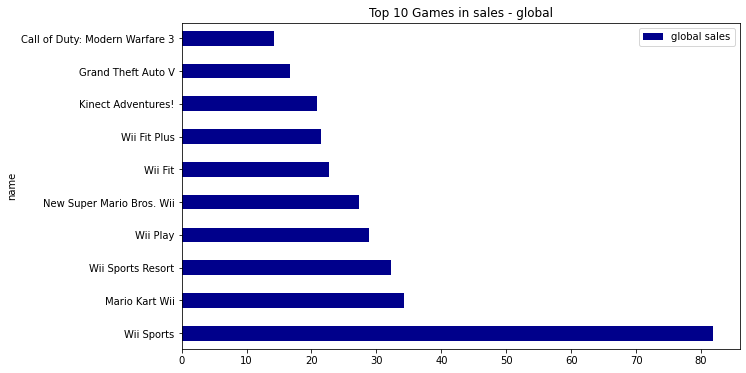

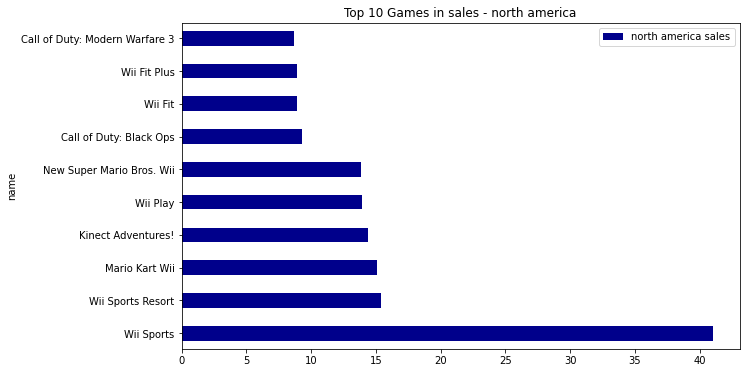

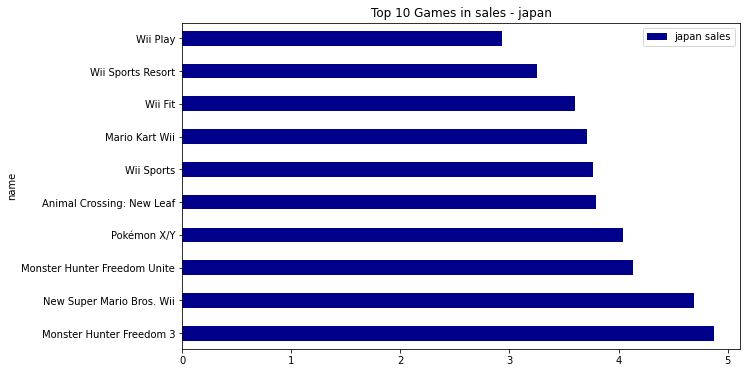

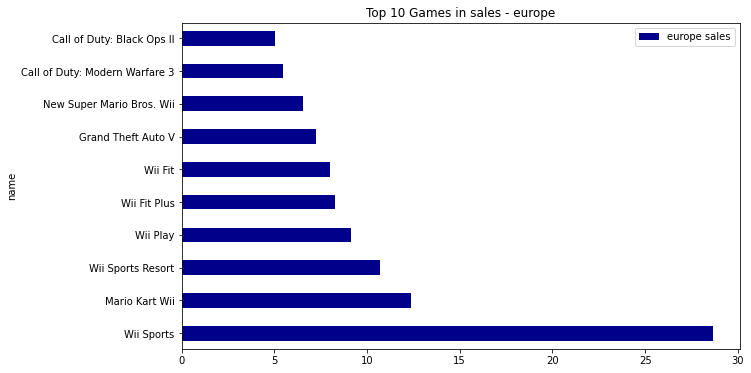

In [3]:
def plot_games_top10(zone = 'global sales', grid = True):
    top = df.sort_values(by=zone, ascending=False)
    top = top[['name',zone]].set_index('name')
    top = top.head(10)
    ax = top.plot(kind='barh', 
          figsize = (10, 6), 
          width = 0.45,
          linewidth=4,
          color='DarkBlue')
    
    tt = "Top 10 Games in sales - " + zone[:-6]
    ax.set_title(tt)
    plt.legend([zone])

plot_games_top10('global sales')
plot_games_top10('north america sales')
plot_games_top10('japan sales')
plot_games_top10('europe sales')

Podemos notar que o jogo Wii Sports leva grande vantagem no ranking de vendas global. Sendo o jogo mais comprado também nas na região da Europa e Norte América.

2. Quais jogos tem melhor avaliação ("rate") do público? 

In [4]:
#The reason why score is not a float - tbd values
df.groupby(['user score'])['user score'].count()

user score
0.5      1
0.7      2
0.8      1
0.9      2
1.0      1
      ... 
9.2      8
9.3      6
9.4      1
9.5      2
tbd    844
Name: user score, Length: 91, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Score')

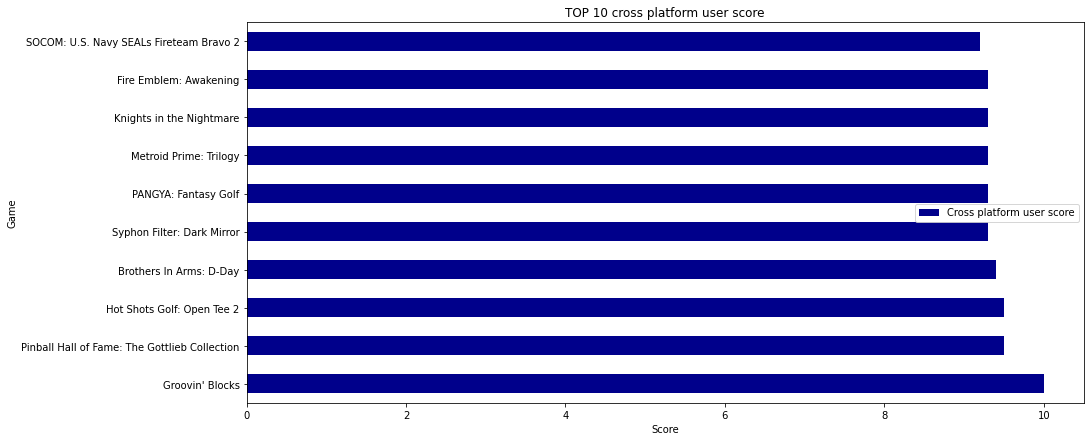

In [5]:
only_usr_score_df = df[df['user score'] != 'tbd']
only_usr_score_df['user score'] = only_usr_score_df['user score'].astype('float64')

only_usr_score_df = only_usr_score_df.fillna(0) \
                                     .groupby(['name']) \
                                     .agg(score_count=('user score','count'),
                                          sum_score=('user score', 'sum')) \
                                     .reset_index()
only_usr_score_df['Cross platform user score'] = only_usr_score_df['sum_score'] / only_usr_score_df['score_count']
only_usr_score_filtered_df = only_usr_score_df[['name', 'Cross platform user score']].sort_values(['Cross platform user score', 'name'], ascending=False)
only_usr_score_filtered_df.head(10).plot(kind='barh', x='name', figsize=(15,7), linewidth = 5, color='DarkBlue')

plt.title('TOP 10 cross platform user score')
plt.ylabel('Game')
plt.xlabel('Score')

3. Qual plataforma tem mais títulos? 

Text(0.5, 0, 'Count')

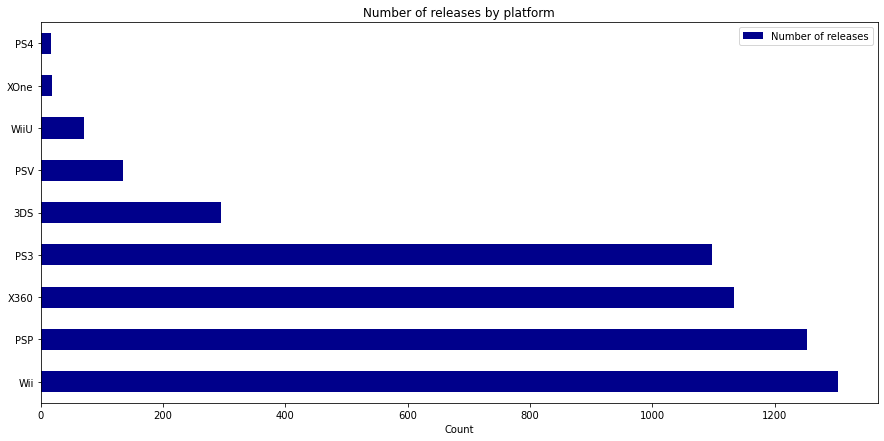

In [6]:
df_plat = pd.DataFrame(df['platform'].value_counts())
df_plat.rename(columns = {'index':'Platform','platform':'Number of releases'}, inplace=True)
df_plat.plot(kind='barh',
            figsize=(15,7),
            linewidth = 5,
            color='DarkBlue')
plt.title('Number of releases by platform')
plt.xlabel('Count')

A maior parte dos jogos está distribuida nas plataformas PS3, X360, PSP e Wii.

4. Qual a distribuição dos jogos por ano de publicação? 

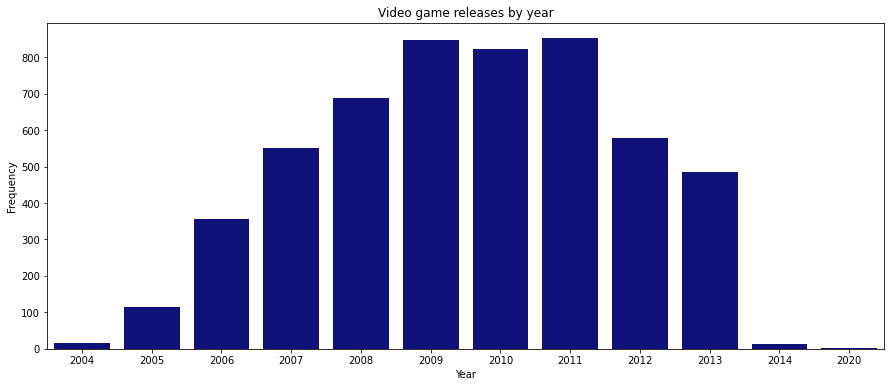

In [7]:
df_year = df['release year']
df_year = pd.DataFrame(df_year.value_counts())
df_year = df_year.sort_values('release year' , ascending=False).reset_index()
df_year.rename(columns = {'index':'Year','release year':'Frequency'}, inplace=True)

fig = plt.figure(figsize=(15,6))
ax=sns.barplot(x='Year', y='Frequency', data=df_year, color='DarkBlue')
tt='Video game releases by year'
ax.set_title(tt)
ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
ax.axes.get_xaxis().set_visible(True)

O dataset apresenta uma concentração de lançamentos de jogos dentre os anos de 2009 a 2011. Com declínio do númeo de lançamentos a partir de 2012.

5. Os jogos com melhores avaliações têm os maiores números de vendas?


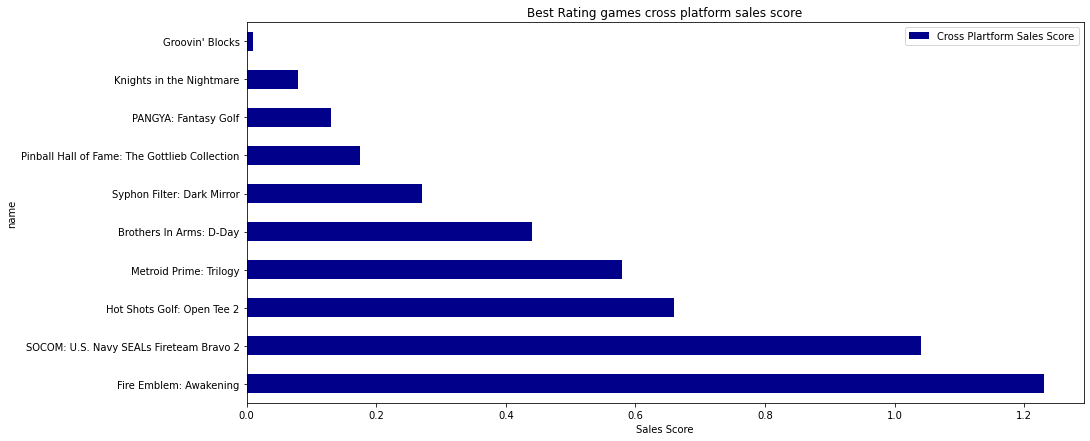

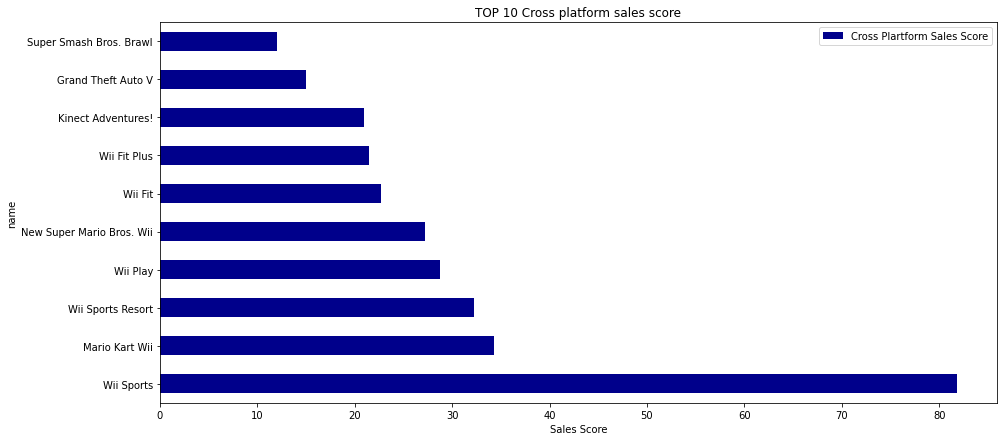

In [8]:
# code
def sales_score_plot(plot_df, title):
  plot_df = plot_df.fillna(0) \
               .groupby(['name']) \
               .agg(sales_count=('global sales', 'count'),
                    sales_score=('global sales', 'sum')) \
               .reset_index()

  plot_df['Cross Plartform Sales Score'] = plot_df['sales_score'] / plot_df['sales_count']
  plot_df = plot_df[['name', 'Cross Plartform Sales Score']].sort_values(['Cross Plartform Sales Score', 'name'], ascending=False)
  plot_df.head(10).plot(kind='barh', x='name', figsize=(15,7), linewidth = 5, color='DarkBlue')
  plt.xlabel('Sales Score')
  plt.title(title)


best_rate_list = only_usr_score_filtered_df.head(10)['name'].tolist()
df_cut = df.query('name in @best_rate_list')

sales_score_plot(df_cut, 'Best Rating games cross platform sales score')
sales_score_plot(df, 'TOP 10 Cross platform sales score')

Podemos notar que os melhores rankeados não são necessariamente bons vendedores. Isso pode acontecer pois alguns jogos não são conhecidos e por isso quase não obtiveram ratings - se mantendo no top 10.

6. Os jogos com maior número de avaliações tem as melhores avaliações?

In [9]:
df[['critic count', 'critic score']].corr()

critic count  critic score
critic count      1.000000      0.501672
critic score      0.501672      1.000000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


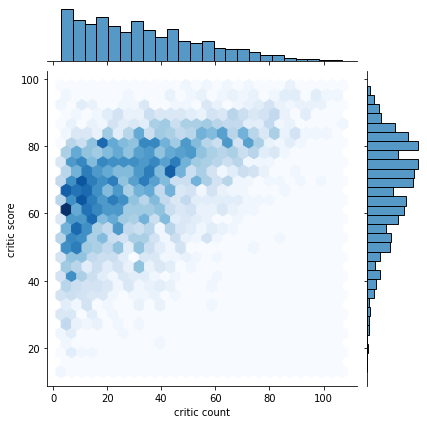

In [10]:
ax = sns.jointplot(df['critic count'],
                   df['critic score'],
                   cmap='Blues',
                   kind='hex')

O coeficiente de correlação entre os número de avaliações e as notas atribuidas é de aproximadamente 0.5. 

Podemos observar que os jogos com maior número de avaliações geralemente recebem as melhores notas, porém, esta parcela representa uma porção muito pequena do dataset.

7. Os jogos com maior venda são também os com maior número de avaliações
(Critic_count; User_count)?  

In [11]:
critic_user_corr_df = df[['critic count', 'user count']].dropna()

In [12]:
critic_user_corr_df.corr()

critic count  user count
critic count      1.000000    0.420408
user count        0.420408    1.000000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


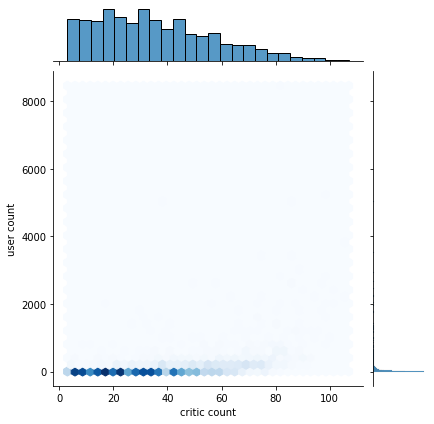

In [13]:
ax = sns.jointplot(critic_user_corr_df['critic count'],
                   critic_user_corr_df['user count'],
                   cmap='Blues',
                   kind='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


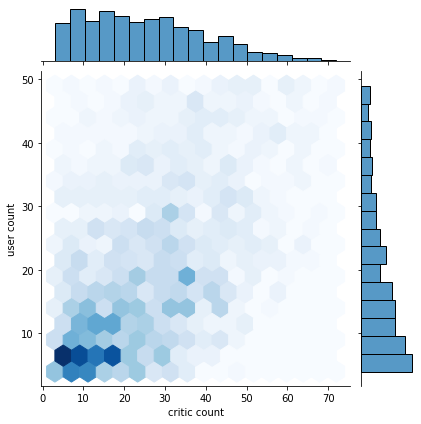

In [14]:
ax = sns.jointplot(critic_user_corr_df[critic_user_corr_df["user count"] < 50]['critic count'],
                   critic_user_corr_df[critic_user_corr_df["user count"] < 50]['user count'],
                   cmap='Blues',
                   kind='hex')

O coeficiente de correlação entre os número de avaliações e as notas atribuidas é de aproximadamente 0.4. 

Podemos ver que a maior partes dos jogos com notas de criticas ruins tambem sofrem de poucos users.